**Proyecto personal**

**Metodología: KDD PROCESS**

El término KDD es una forma de referirnos a la obtención del conocimiento a partir de
una colección de datos.

<img src="https://www.researchgate.net/profile/Ily-Ahmad-Sabri/publication/334784343/figure/fig1/AS:786618394886146@1564555848887/Knowledge-Discovery-Database-KDD-Process.png" height="400">

#**Selección de Datos**

**Presentación del caso**

<img src="https://storage.googleapis.com/kaggle-media/welcome/screen1.png" alt="Simply Easy Learning" width="1000" 
         height="300" >

Los datos provienen de una [competencia de Kaggle](https://www.kaggle.com/c/titanic) "Titanic - Machine Learning from disaster", comprende una data de entrenamiento, una data de prueba y una data real para evaluar el porcentaje de acierto.

Las columnas (variables) son las siguientes:

1.   **Sobrevivio:** Si la persona murió se registra 0, si sobrevivió registra 1
2.   **Pclass:** Status socioeconómico (1st = Alto, 2nd=Medio, 3rd=Bajo)
3.   **Name:** Nombre del pasajero
4.   **Genero:** Male (hombre) o Female (Mujer)
5.   **Edad:** Edad del pasajero en números
6.   **Hermanos:** N° hermanos que viajaron junto al pasajero (desde 0)
7.   **Padres_hijos:** N° padres y/o hijos que viajaron junto al pasajero (desde 0)
8.   **Ticket:** La clase de ticket que sacó el pasajeroTarifa: El costo del ticket que se compró para el pasaje
9.   **Cabin:** El número de cabina o habitación que ocupó durante el viaje
10.  **P_embarque:** Lugar donde abordó (C=Cherbourg, Q=Queenstown, S=Southampton) 








In [ ]:
#importar las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random #Una librería para manejar números aleatorios
import missingno as ms #Librería muy útil para ver los valores nulos

In [ ]:
#Importamos con pandas los archivos necesarios
data_titanic = pd.read_csv('https://raw.githubusercontent.com/SergioGerman412/Datasets/main/competencia-titanic.csv', index_col="IdPasajero")
data_titanic

,Unnamed: 0,Sobrevivio,Pclass,Name,Genero,Edad,Hermanos,Padres_hijos,Ticket,Tarifa,Cabin,P_embarque
IdPasajero,,,,,,,,,,,,
1,0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
data_titanic.drop(['Unnamed: 0'], axis = 1,inplace=True) 

In [ ]:
#Mostramos los primeros registros 
data_titanic.head()

,Sobrevivio,Pclass,Name,Genero,Edad,Hermanos,Padres_hijos,Ticket,Tarifa,Cabin,P_embarque
IdPasajero,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Mostramos los principales indicadores de las variables cuantitativas 
data_titanic.describe()

,Sobrevivio,Pclass,Edad,Hermanos,Padres_hijos,Tarifa
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


En base al describe:

*   Se deduce que hay datos nulos en la columna Edad (174)
*   La edad media de los pasajeros es de 29.7 años y la desviación estándar es 14.53
*   La edad mínima encontrada en el dataset es de aprox 0.42 y máxima de 80 años.








In [ ]:
#visualizamos si se encuentra balanceado el dataset
data_titanic['Sobrevivio'].value_counts()

0    549
1    342
Name: Sobrevivio, dtype: int64

<Axes: xlabel='Sobrevivio', ylabel='count'>

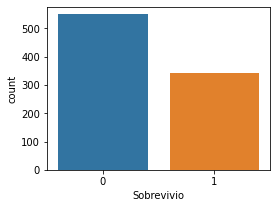

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(data = data_titanic, x="Sobrevivio")

Revisando la variable Sobrevivio, se verifica que hay una data desbalanceada lo que podría originar un sesgo del modelo al contar con muchos menos datos con target = 1 (sobrevivió).

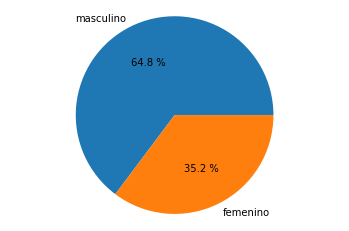

In [ ]:
#gráfica para visualizar el género
import matplotlib.pyplot as plt

Genero = [len(data_titanic.query("Genero=='male'")),len(data_titanic.query("Genero=='female'")) ]
Datos = ["masculino","femenino"]
plt.pie(Genero, labels=Datos, autopct="%0.1f %%")
plt.axis("equal")
plt.show()


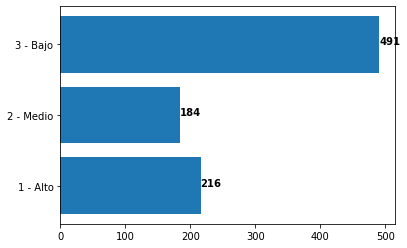

In [ ]:
#gráfica para visualizar la pclass
cantidad =  [len(data_titanic.query("Pclass==1")),len(data_titanic.query("Pclass==2")), len(data_titanic.query("Pclass==3")) ]
Status =  ["1 - Alto","2 - Medio", "3 - Bajo"]
plt.barh(Status, cantidad)
for index, valor in enumerate(cantidad):
  plt.text(valor, index, valor, color = "black", fontweight = "bold")

Eliminaremos las variables que no son significativas para predecir si una persona sobrevive o no dentro del Titanic:

**Nombre:** No identificamos ningún valor a partir del nombre para predecir la supervivencia del pasajero

**Ticket:** Si bien se podría pensar que el ticket nos daría algún criterio, en este caso no se ha encontrado una relación directa.

**Cabin:** La misma razón quel Ticket.

In [ ]:
#eliminar columnas innecesarias
data_titanic.drop(['Name','Ticket','Cabin'], axis = 1,inplace=True) #con el parámetro inplace=True se actualiza o sobreescribe el dataset

# **PreProcesamiento**

## Datos Nulos y Datos Duplicados

Grafica nuestro dataframe para ver las columnas que tienen datos vacíos(representados por los espacios en blanco).

Se recomienda su uso cuando el dataset no cuenta con muchas columnas

<Axes: >

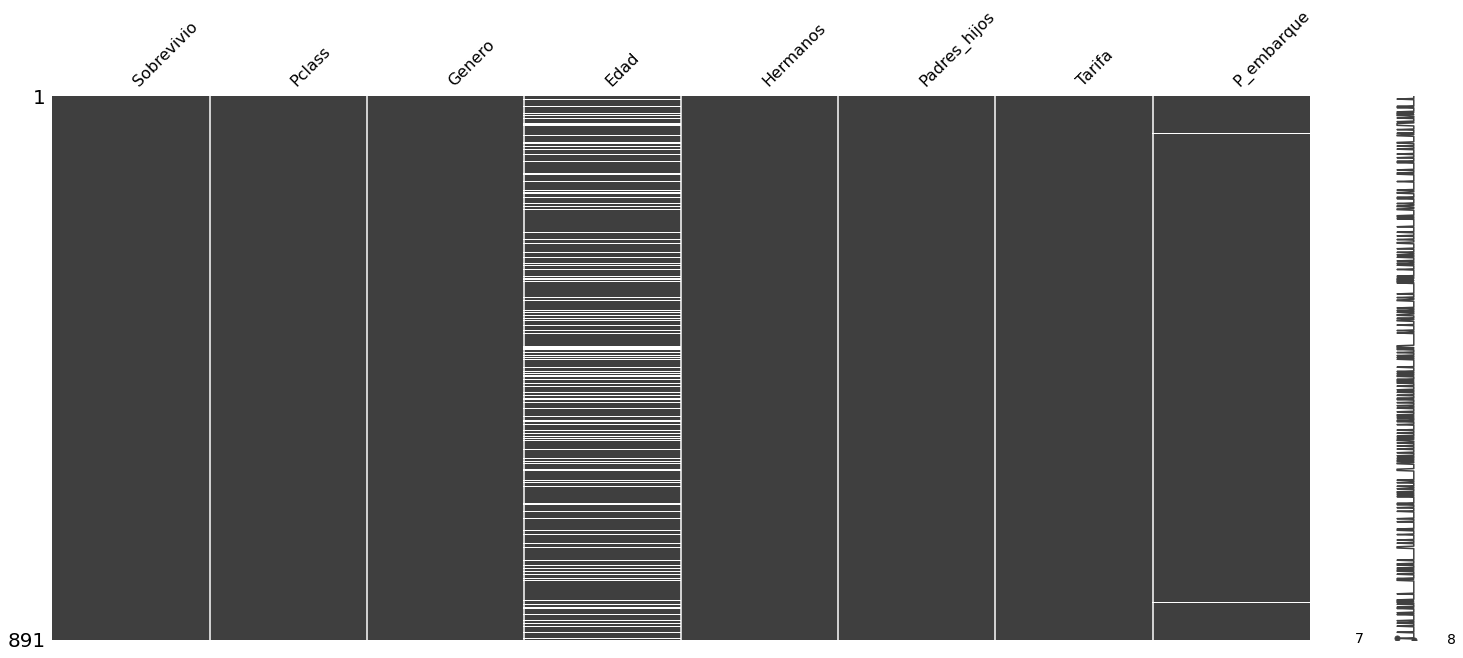

In [ ]:
#A través del método .matrix de la librería missingno -renombrada como ms- obtenemos la gráfica de los nulos
ms.matrix(data_titanic)

Se aprecian datos nulos en Edad y P_embarque

In [ ]:
#Elaboramos un bucle (repeticiones) para evaluar en cada columna isna y sum
for col in data_titanic.loc[:, data_titanic.isna().any()].columns:                                     
  print('En la columna',col,'hay',data_titanic[col].isna().sum(),'valores nulos')

En la columna Edad hay 177 valores nulos
En la columna P_embarque hay 2 valores nulos


In [ ]:
data_titanic.isnull().sum()

Sobrevivio        0
Pclass            0
Genero            0
Edad            177
Hermanos          0
Padres_hijos      0
Tarifa            0
P_embarque        2
dtype: int64

In [ ]:
#Crearemos una función para llenar de manera random dentro del intervalo de la media y desviación estándar
def llena_nan_con_media_y_std(df,col='Edad'):
    nan = df[df[col].isna()] #el dataset de los que tienen la columna (col = 'Edad' ) con valores nulos
    min_ = df[col].mean() - df[col].std() #El comienzo de nuestro intervalo, la media menos la desv. estandar.
    max_ = df[col].mean() + df[col].std() #El final de nuestro intervalo, la media más la desv. estandar.
    for i in nan.index: #Para cada i en los index de mi data nula
        random_num = random.uniform(int(min_),int(max_)) #randomizo dentro de los intervalos que quiero y especifico que quiero enteros
        df[col].loc[i] = random_num #Reemplazo los valores dentro de mi data original.

In [ ]:
#Aplicamos la función para reemplazar los nulos de la columna Edad
llena_nan_con_media_y_std(data_titanic)

<ipython-input-14-e2c83ccf291b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].loc[i] = random_num #Reemplazo los valores dentro de mi data original.


In [ ]:
#Con el método .fillna reemplazamos los vacíos de la columna P_embarque con la moda por ser el puerto de embarque más repetido 
data_titanic['P_embarque'].fillna(data_titanic['P_embarque'].mode()[0], inplace=True)

##Detectando y procesando outliers

<Axes: >

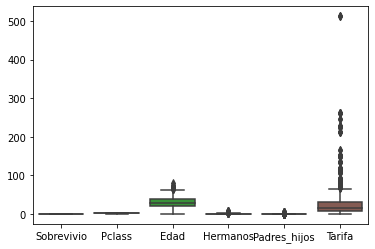

In [ ]:
#Aplicamos el método boxplot de la librería seaborn indicando data como fuente de datos
sns.boxplot(data=data_titanic)

Viendo el boxplot es evidente que los datos más alejados del resto se ubican en la variable Tarifa.

Para ello procedemos a reemplazarlos con el percentil 95.

In [ ]:
#Aplicamos .index para obtener las filas superiores del percentil 95 y .loc para reemplazar los outliers por el percentil 95
outliers = data_titanic[data_titanic['Tarifa'] > data_titanic['Tarifa'].quantile(.95)].index
data_titanic.loc[outliers,'Tarifa'] = data_titanic['Tarifa'].quantile(.95)

##Feature Engineering

En situaciones de supervivencia antes desastres un factor muy importante es la familia. En este caso hay dos variables relacionadas a la familia del pasajero (Hermanos & Padres_hijos).

Por ello hemos considerado relevante crear **dos variables**:
*   Miembros_familia: **total** de **familiares incluyendo** al pasajero
*   Viaja_solo: 1 = si el pasajero **viajaba sin ningún familiar**, 0 = si el pasajero **viajaba con al menos 1 familiar**

sola o acompañada en la nave.

In [ ]:
#Creamos una columna nueva para contar el total entre las columnas Hermanos y Padres_Hijos
data_titanic['Miembros_familia'] = data_titanic['Hermanos'] + data_titanic['Padres_hijos'] + 1 #(1 reempresenta a él o ella)

In [ ]:
#Creamos una columna nueva para distinguir los pasajeros que viajan solos
data_titanic['Viaja_solo'] = 1 
data_titanic['Viaja_solo'].loc[data_titanic['Miembros_familia'] > 1] = 0

<ipython-input-20-9ff1b2ce56a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_titanic['Viaja_solo'].loc[data_titanic['Miembros_familia'] > 1] = 0


In [ ]:
#Comprobamos las columnas creadas
data_titanic.head()

,Sobrevivio,Pclass,Genero,Edad,Hermanos,Padres_hijos,Tarifa,P_embarque,Miembros_familia,Viaja_solo
IdPasajero,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,2,0
2,1,1,female,38.0,1,0,71.2833,C,2,0
3,1,3,female,26.0,0,0,7.9250,S,1,1
4,1,1,female,35.0,1,0,53.1000,S,2,0
5,0,3,male,35.0,0,0,8.0500,S,1,1


##Encodear y verificar la influencia de la variable con el target

**La presencia de menores de edad en el Titanic**
¿Dan prioridad a las mujeres con niños para que puedan ir directo a las naves de rescate? Para comprobar esto es necesario identificar si el pasajero es **niño**.

Para esto, introducimos un nuevo **valor** dentro de la **columna Género**.

In [ ]:
data = data_titanic.copy()

In [ ]:
#Añadimos la categoría niño en la columna Genero para todas las filas cuyo valor en la columna Edad sea menor o igual a 12
data.loc[data['Edad']<=12,'Genero'] = 'niño'

¿Influye el Género del pasajero con el valor de la columna Sobrevivio?

<Axes: xlabel='Genero', ylabel='count'>

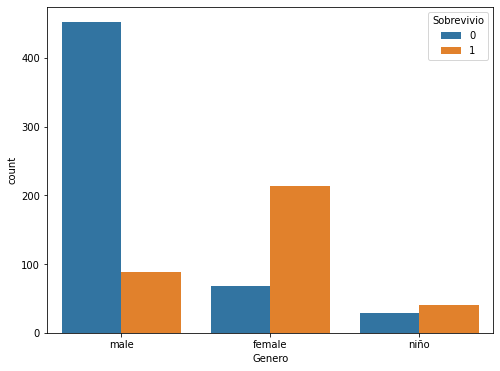

In [ ]:
#Utilizamos .countplot para realizar una gráfica de barras de la columna Genero distinguiendo los valores de la columna Sobrevivio
plt.figure(figsize=(8,6))
sns.countplot(x = 'Genero', data = data, hue="Sobrevivio")

¿Influye el Puerto de embarque del pasajero con el valor de la columna Sobrevivio?

<Axes: xlabel='P_embarque', ylabel='count'>

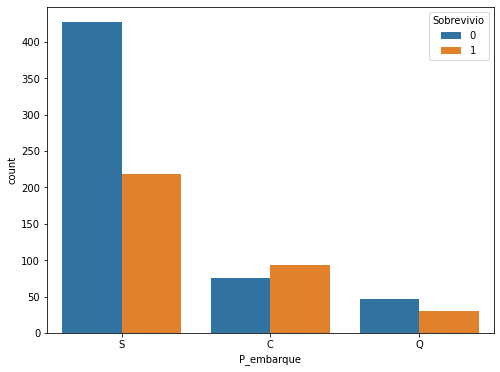

In [ ]:
#Utilizamos .countplot para realizar una gráfica de barras de la columna P_embarque distinguiendo los valores de la columna Sobrevivio
plt.figure(figsize=(8,6))
sns.countplot(x = 'P_embarque', data = data, hue="Sobrevivio")

**Aplicando diccionario para Encodear**

In [ ]:
#Ahora podemos decir qué prioridades de categorías hay dentro de las variables P_embarque y Genero
cat_to_nums = {"P_embarque":  {"S": 1, "C": 3, "Q":5},
               "Genero": {"male":1,"niño":3,"female":5}}
data.replace(cat_to_nums, inplace = True)

In [ ]:
#Comprobamos los cambios realizados
data.head()

,Sobrevivio,Pclass,Genero,Edad,Hermanos,Padres_hijos,Tarifa,P_embarque,Miembros_familia,Viaja_solo
IdPasajero,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,1,2,0
2,1,1,5,38.0,1,0,71.2833,3,2,0
3,1,3,5,26.0,0,0,7.9250,1,1,1
4,1,1,5,35.0,1,0,53.1000,1,2,0
5,0,3,1,35.0,0,0,8.0500,1,1,1


## Viendo correlaciones entre mis datos

<Axes: >

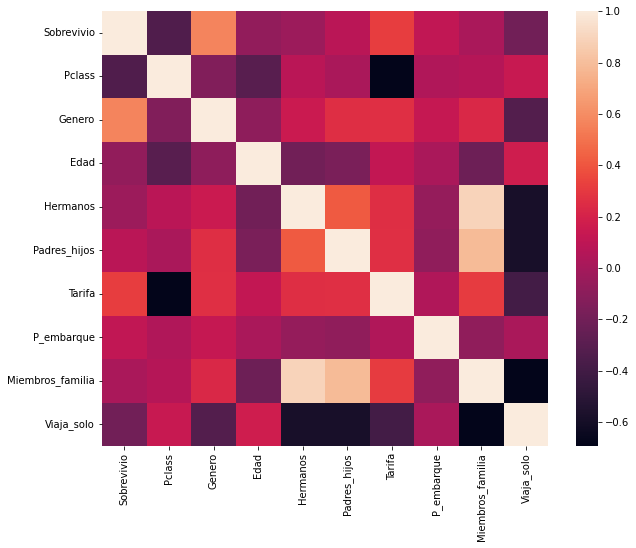

In [ ]:
#Con .corr() -no olvidar los paréntesis- podemos realizar un mapa de calor para identificar si hay correlación entre variables
corr_ = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_)

<ipython-input-30-924a01289ea3>:22: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(cramerv_matrix, dtype=np.bool))


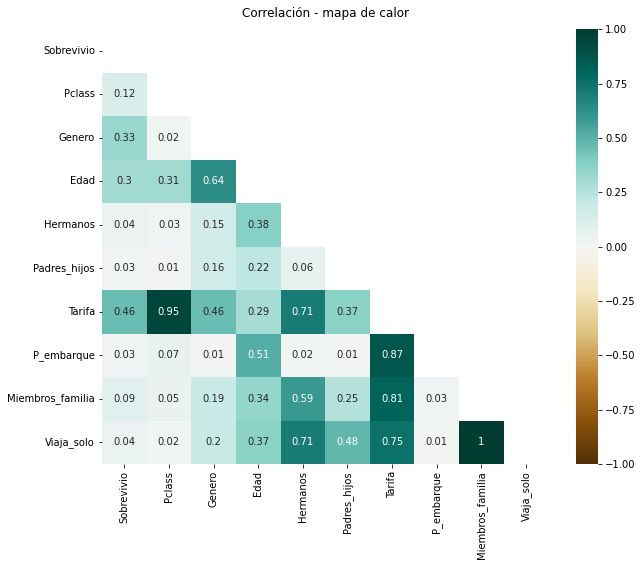

In [ ]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) 
  stat = chi2_contingency(crosstab)[0] 
  obs = np.sum(crosstab) 
  mini = min(crosstab.shape)-1 
  return (stat/(obs*mini))

rows= []

for var1 in data:
  col = []
  for var2 in data :
    cramers =cramers_V(data[var1], data[var2]) 
    col.append(round(cramers,2)) 
  rows.append(col)

cramers_results = np.array(rows)

cramerv_matrix = pd.DataFrame(cramers_results, columns = data.columns, index =data.columns)
mask = np.triu(np.ones_like(cramerv_matrix, dtype=np.bool))
plt.figure(figsize=(10,8))
cat_heatmap = sns.heatmap(cramerv_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
cat_heatmap.set_title('Correlación - mapa de calor', fontdict={'fontsize':12}, pad=12);

Según el gráfico las columnas **Miembros_de_fam**, **Hermanos**, **Padres_hijos** están correlacionadas.

Por ello solo nos quedaremos con la columna que nos aporta mayor información: **Miembros_de_fam**

In [ ]:
#Con .drop eliminamos las columnas Hermanos y Padres_hijos
data.drop(['Hermanos','Padres_hijos'],axis=1, inplace=True)

## Normalizando mi data:
Veamos la distribución de nuestros dos datos netamente numéricos que tenemos: Tarifa y Edad


<ipython-input-32-9c0fab256c3d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Tarifa'])


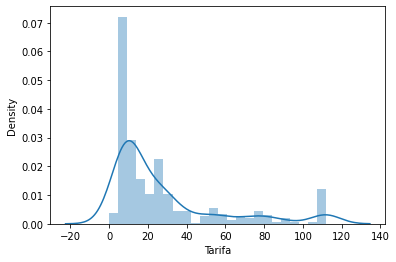

<ipython-input-32-9c0fab256c3d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Edad'])


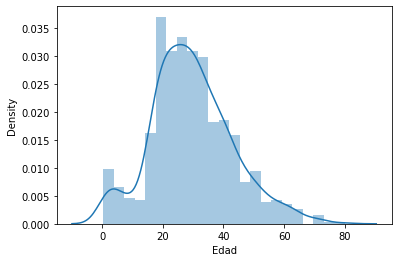

In [ ]:
#Con .distplot mostramos un histograma con una línea de tendencia de ambas variables
sns.distplot(data['Tarifa'])
plt.show()
sns.distplot(data['Edad'])
plt.show()

Las **escalas no difieren demasiado** ya que **ambas variables** se distribuyen **mayormente dentro de las decenas**.

Sin embargo por asuntos de didáctica para terminar el procesamiento de los datos vamos a normalizar ambas variables.

In [ ]:
#Importamos la librería normalize para la normalización de la data.
from sklearn.preprocessing import normalize

#Seleccionamos las columnas que vamos a normalizar
data_to_norm = [data['Tarifa'],data['Edad']]

#Aplicamos normalize sobre las columnas seleccionadas
data_normalizada = normalize(data_to_norm)

In [ ]:
#Asignamos cada los datos normalizados de cada columna: Tarifa y Edad
data = data.assign(Tarifa = data_normalizada[0]) 
data = data.assign(Edad = data_normalizada[1])

#Comprobamos los cambios realizados
data.head()

,Sobrevivio,Pclass,Genero,Edad,Tarifa,P_embarque,Miembros_familia,Viaja_solo
IdPasajero,,,,,,,,
1,0,3,1,0.022643,0.006032,1,2,0
2,1,1,5,0.039111,0.059304,3,2,0
3,1,3,5,0.026760,0.006593,1,1,1
4,1,1,5,0.036024,0.044176,1,2,0
5,0,3,1,0.036024,0.006697,1,1,1


<ipython-input-35-9c0fab256c3d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Tarifa'])


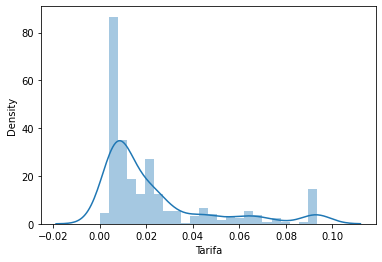

<ipython-input-35-9c0fab256c3d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Edad'])


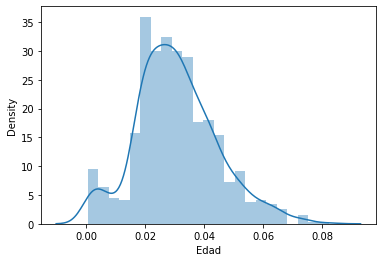

In [ ]:
#Con .distplot mostramos un histograma con una línea de tendencia de ambas variables
sns.distplot(data['Tarifa'])
plt.show()
sns.distplot(data['Edad'])
plt.show()

# **Transformación de datos**

In [ ]:
#Importamos dos dataset para esta competencia el train y summit
train = pd.read_csv('https://raw.githubusercontent.com/SergioGerman412/Datasets/main/train_titanic.csv')
summit = pd.read_csv('https://raw.githubusercontent.com/SergioGerman412/Datasets/main/summit_titanic.csv')

In [ ]:
train.drop(['Unnamed: 0'], axis = 1,inplace=True) 
summit.drop(['Unnamed: 0'], axis = 1,inplace=True) 

In [ ]:
train.head(1)

,Sobrevivio,Pclass,Genero,Edad,Tarifa,P_embarque,Miembros_de_fam,Viaja_solo
0,0,3,1,0.022518,0.006032,1,2,0


In [ ]:
summit.head(1)

,Pclass,Genero,Edad,Tarifa,P_embarque,Miembros_de_fam,Viaja_solo
0,3,1,0.05123,0.007803,5,1,1


En cada **competencia** de Ciencia de Datos se presenta al concursante un conjunto de datos **sin target** exclusivamente con el objetivo de completar este dato faltante. Por lo tanto este conjunto de datos denominado **summit** no se utiliza en el entrenamiento.

In [ ]:
#Denominamos a las variables predictoras X mientras que el target se denomina Y
X = train.drop('Sobrevivio',axis=1)
y = train['Sobrevivio']

In [ ]:
#Realizamos la división de ambas variables
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.15,random_state=1) #Separa el 15% de la data para generar las predicciones

In [ ]:
#Mostramos con el parámetro shape la cantidad de filas que resultaron en cada parte
print('Para el X_train:', X_train.shape, 'y para el y_train',y_train.shape)
print('Para el X_test:',X_test.shape,'y para el y_test',y_test.shape)

Para el X_train: (757, 7) y para el y_train (757,)
Para el X_test: (134, 7) y para el y_test (134,)


# **Minería de Datos**

##Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression #Importamos la librería para aplicar Regresión Logística
rl = LogisticRegression(random_state=1) #creamos la variable rl para guardar el modelo con los parámetros deseados
rl.fit(X_train, y_train) #entrenamos con datos guardados en X_train, y_train
rl_pred = rl.predict(X_test) #generamos las predicciones usando como variables predictoras los datos en X_test
rl_pred #mostramos las predicciones guardadas en la variable rl_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0])

*Probabilidades de la predicción sobre el target*

In [ ]:
#Calculamos la probabilidades de obtener 1 con el método predict_proba
rl_prob = rl.predict_proba(X_test)[:, 1]
rl_prob

array([0.91729564, 0.08136309, 0.82118345, 0.72672992, 0.52482667,
       0.0826539 , 0.19232699, 0.94525274, 0.50460252, 0.8027339 ,
       0.08242648, 0.64878952, 0.34971917, 0.18026305, 0.72616848,
       0.35364663, 0.1343863 , 0.12153028, 0.0818032 , 0.63221405,
       0.08202955, 0.14262996, 0.93165645, 0.18318907, 0.43221445,
       0.08231814, 0.88020459, 0.8184411 , 0.18143172, 0.91935382,
       0.64952848, 0.35250892, 0.32647374, 0.73977099, 0.11411516,
       0.09878873, 0.35226765, 0.08292933, 0.50455385, 0.08271092,
       0.6486182 , 0.66629049, 0.92326366, 0.35068598, 0.57222651,
       0.08185386, 0.07136162, 0.18001865, 0.39785405, 0.18255087,
       0.21118137, 0.82074147, 0.18221456, 0.18031792, 0.08221043,
       0.74005545, 0.18109702, 0.34811681, 0.02301163, 0.64983199,
       0.10792254, 0.09763139, 0.25429892, 0.35073088, 0.45771161,
       0.70607247, 0.10516566, 0.09765791, 0.38939711, 0.19157263,
       0.0887176 , 0.13416234, 0.39515416, 0.0828742 , 0.81672

*Coeficientes de la regresión logística*

In [ ]:
#Mostramos los coeficientes de la ecuación obtenida con la Regresión Logística
coeficientes = pd.DataFrame({'variables':X_train.columns.values, 'betas': np.round(rl.coef_[0],4) })
coeficientes

,variables,betas
0,Pclass,-0.9037
1,Genero,0.7561
2,Edad,-0.7345
3,Tarifa,0.1102
4,P_embarque,0.0930
5,Miembros_de_fam,-0.3521
6,Viaja_solo,-0.7824


In [ ]:
#Calculamos el accuracy comparando las predicciones generadas versus y_test
from sklearn.metrics import accuracy_score
print('El accuracy para mi primero modelo es :{0:.2f}'.format(accuracy_score(y_test,rl_pred))) #usando la expresión regex .2f para mostrar 2 decimales

El accuracy para mi primero modelo es :0.81


*Score de la Regresión Logística*

##Perceptrón Multicapa

In [ ]:
y = train['Sobrevivio']

X = train.iloc[:, 1:8]

In [ ]:
#dividir el dataset
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.15, random_state=18)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [ ]:
#early stopping para evitar el overfitting

early_stopping = callbacks.EarlyStopping(
    min_delta=0.02,   #cantidad mínima de cambio para contar como una mejora
    patience=30,      #cuantas epocas esperar para detener el entrenamiento
    restore_best_weights=True,
    )

In [ ]:
#crear red neuronal artificial
model = keras.Sequential([
    
#crear capa de entrada
    layers.Dense(units=1, activation = 'relu', input_shape=[7]),
 
#crear capa oculta
     layers.Dense(units=1, activation = 'relu'),
     
#crear capa de salida

     layers.Dense(units=1, activation='sigmoid'),

   ])

In [ ]:
#definir optimizador, función de pérdida y métricas

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics=['binary_accuracy'],
    )

In [ ]:
#definir tamaño de lote, épocas, etc.
history = model.fit(
        train_X, train_y,
        validation_data=(val_X, val_y),
        batch_size=20,
        epochs=140,
        callbacks=[early_stopping]
        )

Epoch 1/140
38/38 [==============================] - 3s 11ms/step - loss: 0.8274 - binary_accuracy: 0.6196 - val_loss: 0.8236 - val_binary_accuracy: 0.5970
Epoch 2/140
38/38 [==============================] - 0s 6ms/step - loss: 0.7862 - binary_accuracy: 0.6196 - val_loss: 0.7877 - val_binary_accuracy: 0.5970
Epoch 3/140
38/38 [==============================] - 0s 5ms/step - loss: 0.7612 - binary_accuracy: 0.6196 - val_loss: 0.7636 - val_binary_accuracy: 0.5970
Epoch 4/140
38/38 [==============================] - 0s 7ms/step - loss: 0.7435 - binary_accuracy: 0.6196 - val_loss: 0.7475 - val_binary_accuracy: 0.5970
Epoch 5/140
38/38 [==============================] - 0s 9ms/step - loss: 0.7316 - binary_accuracy: 0.6196 - val_loss: 0.7353 - val_binary_accuracy: 0.5970
Epoch 6/140
38/38 [==============================] - 0s 11ms/step - loss: 0.7226 - binary_accuracy: 0.6196 - val_loss: 0.7268 - val_binary_accuracy: 0.5970
Epoch 7/140
38/38 [==============================] - 0s 8ms/step - l

In [ ]:
#definir y_pred
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
#transformar datos a binarios discretos
y_pred1 = list(map(lambda x:1 if x>0.5 else 0, y_pred))

#**Evaluación e Interpretación**

##Regresión Logística

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

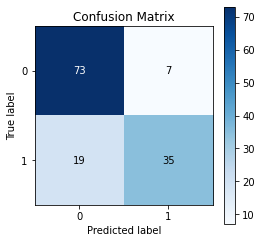

In [ ]:
from sklearn.metrics import accuracy_score
precisión2 = accuracy_score(y_test, rl_pred)


!pip install -q scikit-plot
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, rl_pred, figsize=(4,4))

In [ ]:
from sklearn.metrics import classification_report
rf_report2 = classification_report(y_test, rl_pred, target_names=['No', 'Si'])
print(rf_report2)

              precision    recall  f1-score   support

          No       0.79      0.91      0.85        80
          Si       0.83      0.65      0.73        54

    accuracy                           0.81       134
   macro avg       0.81      0.78      0.79       134
weighted avg       0.81      0.81      0.80       134



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score #Importamos las librerías necesarias para dibujar las curvas ROC
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, rl_pred) #Obtenemos las métricas de la curva ROC 
print('roc_auc_score Perceptrón Multicapa: ', roc_auc_score(y_test, rl_pred))


roc_auc_score Perceptrón Multicapa:  0.7803240740740741


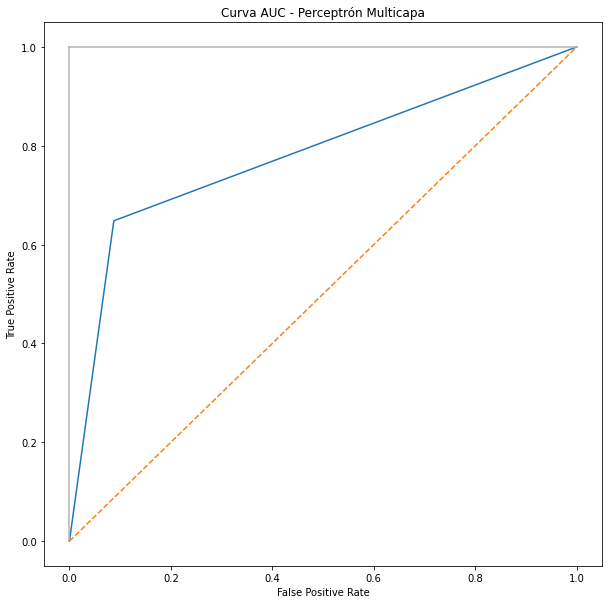

In [ ]:
#Dibujamos la curva ROC con las métricas obtenidas para Perceptrón Multicapa
plt.subplots(1, figsize=(10,10))
plt.title('Curva AUC - Perceptrón Multicapa')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##Perceptrón Multicapa

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

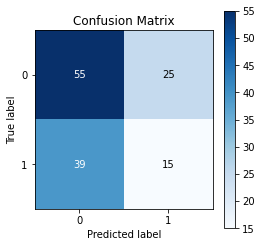

In [ ]:
from sklearn.metrics import accuracy_score
precisión = accuracy_score(val_y, y_pred1)


!pip install -q scikit-plot
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(val_y, y_pred1, figsize=(4,4))

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(val_y, y_pred1)
accuracy 

0.5223880597014925

In [ ]:
from sklearn.metrics import classification_report
rf_report = classification_report(val_y, y_pred1, target_names=['No', 'Si'])
print(rf_report)

              precision    recall  f1-score   support

          No       0.59      0.69      0.63        80
          Si       0.38      0.28      0.32        54

    accuracy                           0.52       134
   macro avg       0.48      0.48      0.48       134
weighted avg       0.50      0.52      0.51       134



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score #Importamos las librerías necesarias para dibujar las curvas ROC
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(val_y, y_pred1) #Obtenemos las métricas de la curva ROC usando y_test vs rl_prob
print('roc_auc_score Perceptrón Multicapa: ', roc_auc_score(val_y, y_pred1))


roc_auc_score Perceptrón Multicapa:  0.48263888888888884


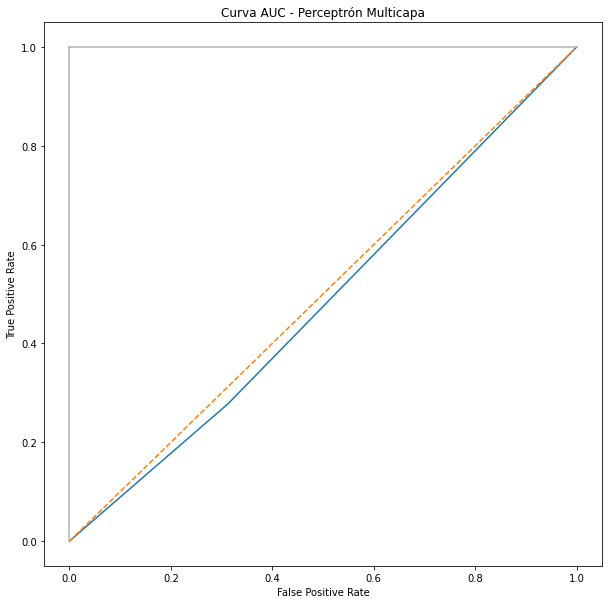

In [ ]:
#Dibujamos la curva ROC con las métricas obtenidas para Perceptrón Multicapa
plt.subplots(1, figsize=(10,10))
plt.title('Curva AUC - Perceptrón Multicapa')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()